# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
# sns.set_style("whitegrid")
# sns.set_context("poster")
sns.set_theme(context='paper', style='whitegrid', font='sans-serif', font_scale=1.2, palette='muted')

***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

/Users/sp-square/opt/anaconda3/envs/virtual_workspace/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

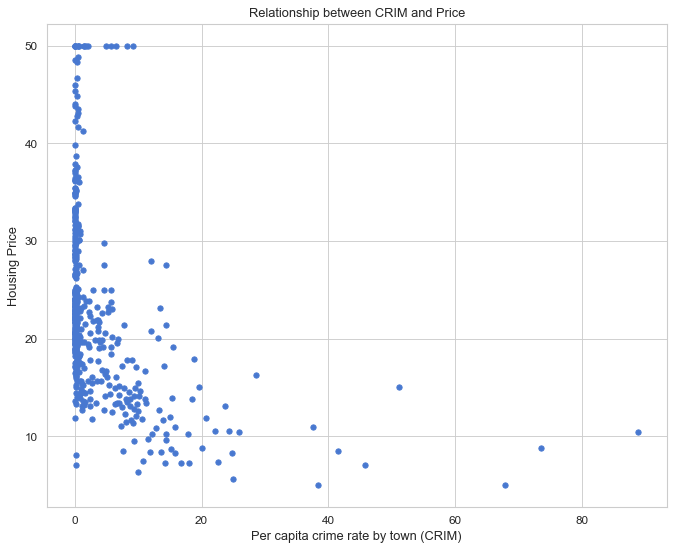

In [12]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price");

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

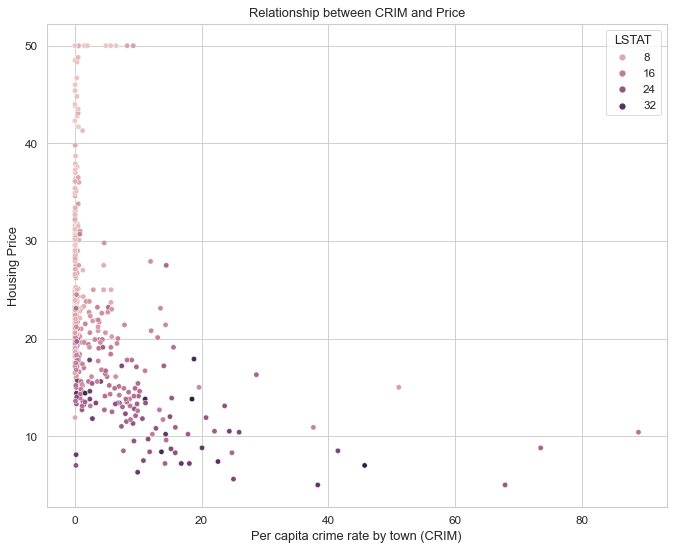

In [13]:
# your turn: describe relationship
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(data=bos, x='CRIM', y='PRICE', hue='LSTAT');
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price");

Not too surprisingly, there seems to be negative correlation between crime rate per capita (CRIM) and housing prices, as well as between the % lower status of the population (LSTAT) and housing prices as suggested by the hue of the dots. There are a few outliers where housing prices stay very high despite higher crime rates.

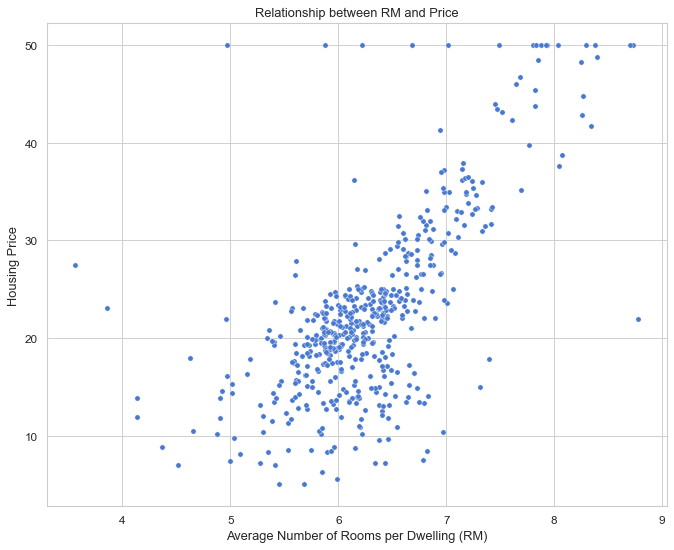

In [14]:
# your turn: scatter plot between *RM* and *PRICE*
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(data=bos, x='RM', y='PRICE');
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price");

Not surprisingly there either, there seems to be a positive correlation between the average number of rooms per dwelling (RM) and housing prices. There are a number of outliers, particularly where housing prices remain very high across varying average number of rooms. It would be interesting to see if those outliers are the same as in the previous graph.

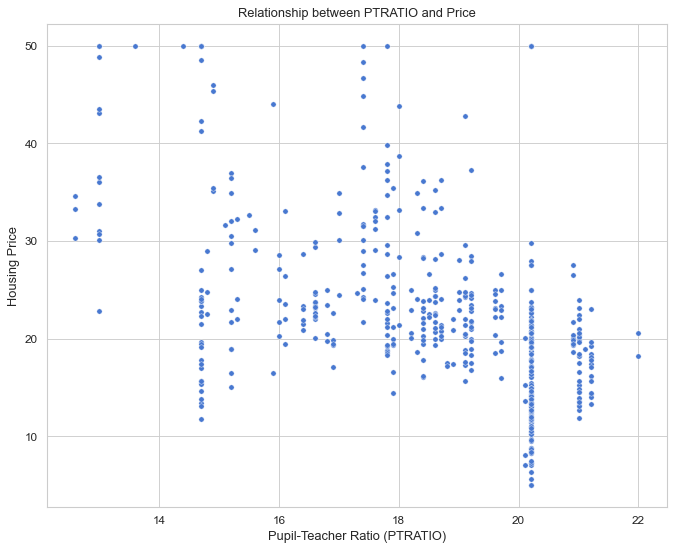

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(data=bos, x='PTRATIO', y='PRICE');
plt.xlabel("Pupil-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price");

There might be a slightly negative correlation between housing prices and pupil-teacher ration, albeit harder to detect to the noise in the data. It might be interesting to control for the ratio of public schools.

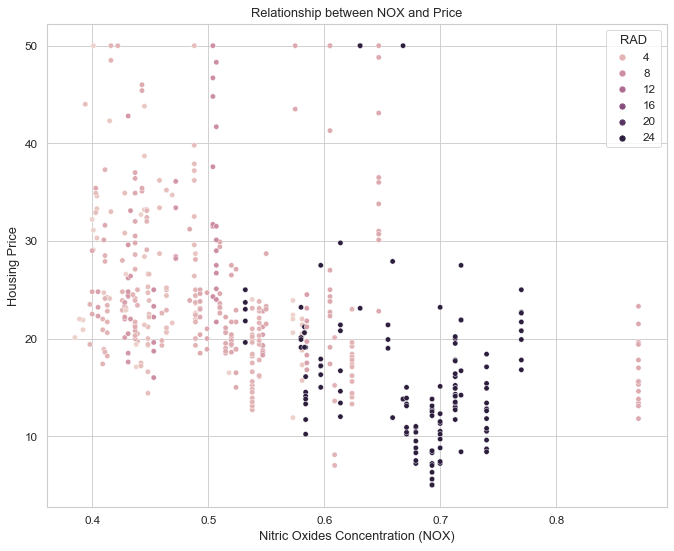

In [16]:
# your turn: create some other scatter plots
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(data=bos, x='NOX', y='PRICE', hue='RAD');
plt.xlabel("Nitric Oxides Concentration (NOX)")
plt.ylabel("Housing Price")
plt.title("Relationship between NOX and Price");

There seems to be a slight negative correlation between housing prices and nitric oxides concentration. Adding a hue to highlight accessibility to radial highways reveals two clusters where one cluster has lower accesibility to radial highways and lower NOX and higher housing prices, and another cluster with seemingly higher levels on both features and lower housing prices.

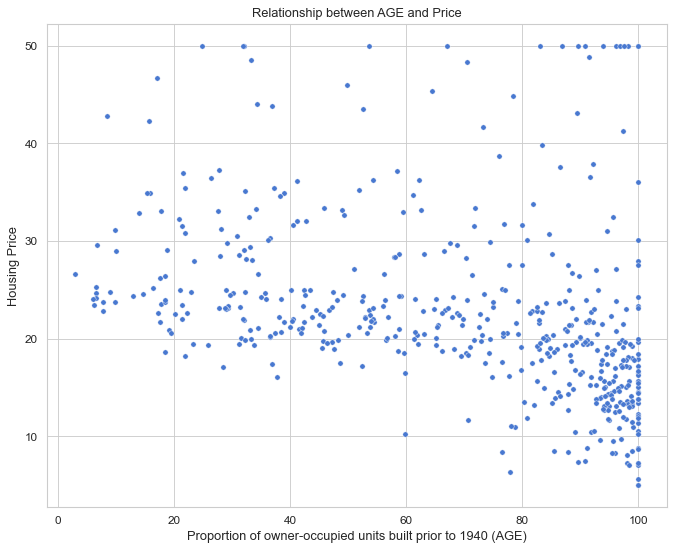

In [17]:
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(data=bos, x='AGE', y='PRICE');
plt.xlabel("Proportion of owner-occupied units built prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price");

There seems to be a negative correlation between age of dwelling and housing prices.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

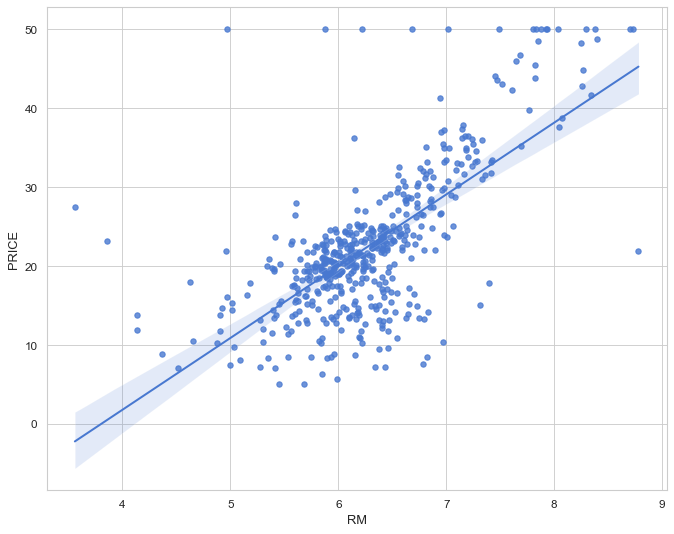

In [18]:
plt.figure(figsize=(10, 8), dpi=80)
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


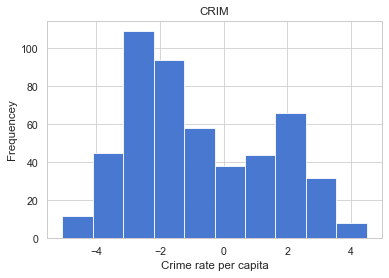

In [19]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

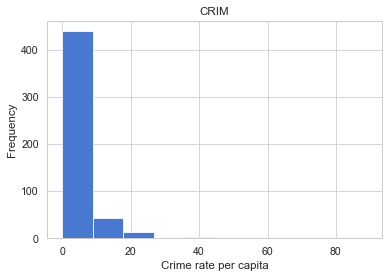

In [20]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency")
plt.show()

The distribution of CRIM is heavily skewed to the right and we cannot distinguish any trend in the data. By taking the log, we try to reduce the skewness and get a distribution closer to the normal distribution. Although the resulting distribution is not normal, we do see an interesting bimodal pattern in the CRIM variable. This outcome was not obvious prior to the transformation.

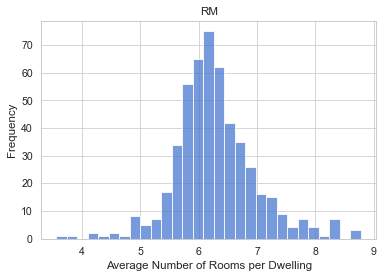

In [21]:
sns.histplot(bos.RM)
plt.title("RM")
plt.xlabel("Average Number of Rooms per Dwelling")
plt.ylabel("Frequency")
plt.show()

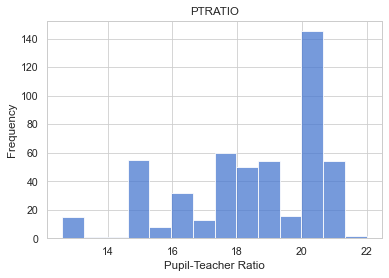

In [22]:
sns.histplot(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

The distribution is skewed to the left. We can try to take the log.

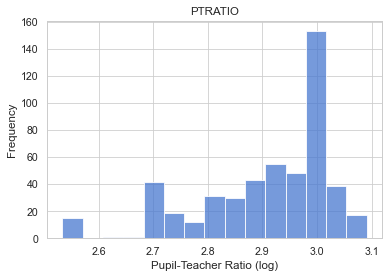

In [23]:
sns.histplot(np.log(bos.PTRATIO))
plt.title("PTRATIO")
plt.xlabel("Pupil-Teacher Ratio (log)")
plt.ylabel("Frequency")
plt.show()

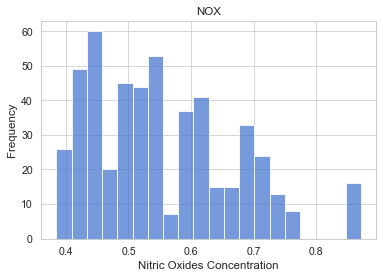

In [24]:
sns.histplot(bos.NOX, bins=20)
plt.title("NOX")
plt.xlabel("Nitric Oxides Concentration")
plt.ylabel("Frequency")
plt.show()

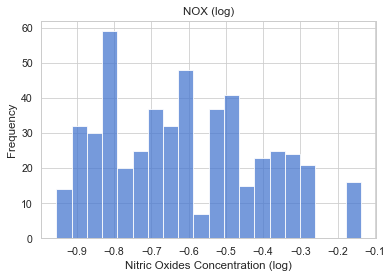

In [25]:
sns.histplot(np.log(bos.NOX), bins=20)
plt.title("NOX (log)")
plt.xlabel("Nitric Oxides Concentration (log)")
plt.ylabel("Frequency")
plt.show()

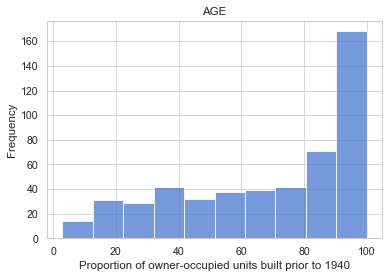

In [26]:
sns.histplot(bos.AGE)
plt.title("AGE")
plt.xlabel("Proportion of owner-occupied units built prior to 1940")
plt.ylabel("Frequency")
plt.show()

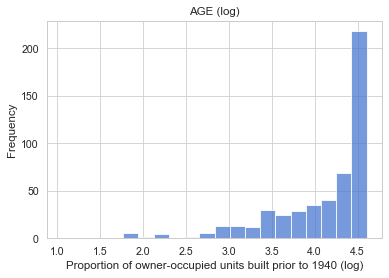

In [27]:
sns.histplot(np.log(bos.AGE))
plt.title("AGE (log)")
plt.xlabel("Proportion of owner-occupied units built prior to 1940 (log)")
plt.ylabel("Frequency")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           2.49e-74
Time:                        09:24:11   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

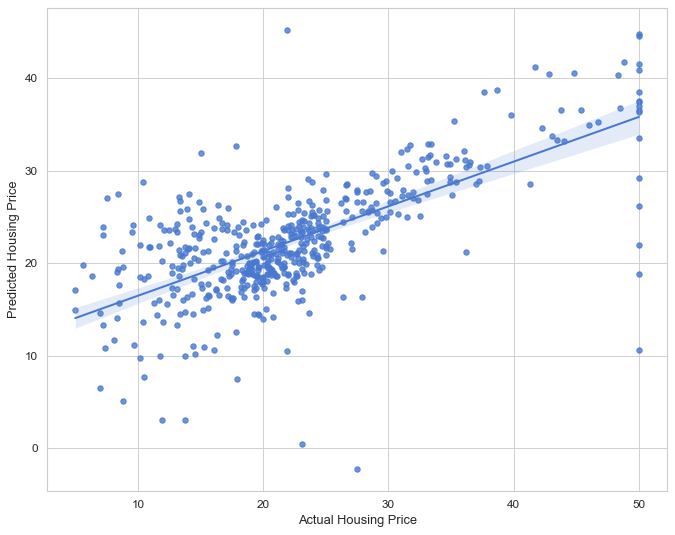

In [30]:
# your turn
plt.figure(figsize=(10, 8), dpi=80)
sns.regplot(y=m.fittedvalues, x=bos.PRICE, fit_reg = True)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.show()

The two sets of prices are clearly positively correlated indicating that the RM feature is a good predictor for now. However, it does look like a number of outliers at the high end of actual housing prices are affecting how well the model is fitting. It would seem worthwhile to investigate and possibly remove those outliers.

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [32]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [33]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [34]:
# your turn
# How would you change the model to not fit an intercept term?
lm_no_intercept = LinearRegression(fit_intercept=False)
lm_no_intercept.fit(X, bos.PRICE)
print(lm_no_intercept.intercept_)

0.0


In [35]:
# Would you recommend not having an intercept? Why or why not?

It would seem to make sense to force our regression through zero given the scenario we are looking at: a housing with zero rooms should have a price of zero. Since common sense tells us that the true intercept should be zero, then it seems that we would improve our fit if we forced our estimated regression through zero. However, we do not have the full picture in our data: we only have a certain range of X values observed that may be quite removed from the area around the zero-intercept, and we only care to get a good estimate over our X range. By forcing our regression through the origin, we are not only asserting that the true intercept is zero (which we have reasonable prior knowledge of), but we are also implicitly asserting what the true values y take on as we move away from the origin towards our range of X values (which we don't have prior knowledge of). If we are wrong about the latter assumption, then forcing our model to have a zero-intercept might significantly distort it. So if the only thing we are sure we know about our function is that it passes through the origin, then we either need to figure out a way to incorporate only that information into your fitting procedure, or else you need to ignore that information in your fitting procedure and not force our regression through the origin.

In [36]:
# One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed).
# To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.


According to this article: https://timeseriesreasoning.com/contents/assumptions-of-linear-regression/, the OLS model makes at least the following four assumptions:
1. Linear functional form: The response variable y should be a linearly related to the explanatory variables X.
2. Residual errors should be i.i.d.: After fitting the model on the training data set, the residual errors of the model should be independent and identically distributed random variables.
3. Residual errors should be normally distributed: The residual errors should be normally distributed.
4. Residual errors should be homoscedastic: The residual errors should have constant variance.

Having i.i.d. residuals is a required property. It means that the residuals are independent random variables and their probability distributions are identical. If the residual errors are not independent, then they display a pattern indicating that our model is sub-optimal either because we have not identified additional explanatory variables that would explain that pattern, or there is multicollinearity among our indepdendent variables. Additionally, if the residuals do not have identical probability distributions, then "one cannot reliably use tests of significance such as the F-test for regression analysis or perform confidence interval testing on the predictions." 

Having i.i.d. residuals (assumption #2) does not ensure that the residual errors will be normally distributed (assumption #3) and vice-versa. Normality of the residuals is more a desirable property than a required one. Normality of the residuals tells us that "most of the prediction errors from your model are zero or close to zero and large errors are much less frequent than the small errors."

In [37]:
# True or false. To use linear regression,  𝑌  must be normally distributed. Explain your answer.

False. The OLS estimation method does not require the normality assumption. The normality assumption is applied to the residuals, after fitting our regression model.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [38]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [39]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [40]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [41]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

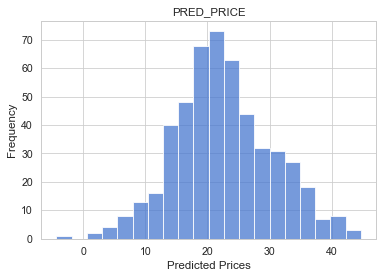

In [42]:
# your turn
bos['PRED_PRICE'] = lm.predict(X)
sns.histplot(bos.PRED_PRICE)
plt.title("PRED_PRICE")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot:ylabel='PRED_PRICE'>

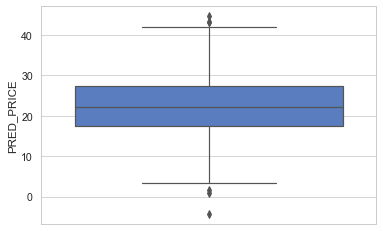

In [43]:
sns.boxplot(y=bos.PRED_PRICE)

In [44]:
bos[['PRED_PRICE', 'PRICE']].describe()

,PRED_PRICE,PRICE
count,506.000000,506.000000
mean,22.532806,22.532806
std,7.915083,9.197104
min,-4.281311,5.000000
25%,17.445740,17.025000
50%,22.118653,21.200000
75%,27.410022,25.000000
max,44.673083,50.000000


The predicted prices seem to be normally distributed with a mean of 22.53 and std of 7.92.There are a few outliers as evidenced with the boxplot, including some negative predicted price. The negative predicted prices might be explained by the fact that our model has a very large negative coefficient for the feature NOX, although this warrants further investigation. At the high end of housing prices, we had already flagged some possible outliers when scatterplotting. We carried through with fitting the model without further examining those possible outliers, which could be input errors. We might have to iterate back to further investigate and deal with those data points.

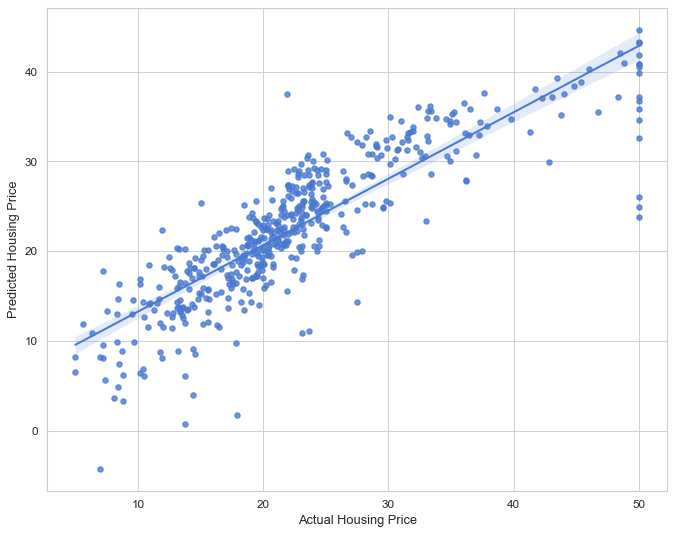

In [45]:
# Let's plot the true prices compared to the predicted prices to see they disagree
plt.figure(figsize=(10, 8), dpi=80)
sns.regplot(y=bos.PRED_PRICE, x=bos.PRICE, fit_reg = True)
plt.xlabel("Actual Housing Price")
plt.ylabel("Predicted Housing Price")
plt.show()

In [46]:
# We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`.
# What are the advantages and disadvantages of each based on your exploration?
# Based on the information provided by both packages, what advantage does `statsmodels` provide?

Here are some differences noted between the two packages:
- purpose: `scikit-learn` seems more designed for prediction, whereas `statsmodels` is more geared towards explanatory statistics
- intercept coefficient: `scikit-learn` allows for easily changing the model to not fit an intercept
- speed: `scikit-learn` is faster than `statsmodels` at linear regression. The difference starts to be noticeable with datasets larger than 1,000 observations
- visualization: `statsmodels` provides a wonderful summary table with key statistics, estimated coefficients and their p-values, etc. Most of the information can be obtained one by one with `scikit-learn`, but there is no comparison to having this summary table.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [47]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954979


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [48]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [49]:
# your turn
# Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town)
# and interpret the intercept and the coefficients.
m = ols('PRICE ~ PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           1.61e-34
Time:                        09:24:15   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

The results give us the following regression line: PRED_PRICE = 62.3446 - 2.1572 * PTRATIO

Both the intercept and the coefficient for PTRATIO are statististically significant with p-values < 0.000 respectively. The predicted price is about `$62,000` at the origin and then decreases by `$2,157` for every unit increase of PTRATIO, thus indicating a negative linear correlation between the two variables.

In [50]:
# Calculate (or extract) the  𝑅2  value. What does it tell you?

The R-squared value is 0.258, which means that our model explains only about 25.8% of the variance in our observations. Thus our model does not fit the data very well at the moment...

In [51]:
# Compute the 𝐹 -statistic. What does it tell you?

The F-statistic indicates whether the group of features chosen for our regression model are jointly significant. Our model currently has only one feature, the PTRATIO. The F-statistic tests the null hypothesis that the fit of the intercept-only model and our model are equal versus the alternative hypothesis that the fit of the intercept-only model is significantly reduced compared to our model. Since the calculated F-statistic is 175.1 and its p-value is 1.61e-34, we can reject the null hypothesis that the fit of the intercept-only model and our model are equal. Instead we can conclude that including the PTRATIO in our model improved the fit.

In [52]:
# Take a close look at the  𝐹 -statistic and the  𝑡 -statistic for the regression coefficient.
# What relationship do you notice?

Since we are in the case of a simple linear regression, we are testing whether a single parameter ( the coefficient associated with PTRAtIO) is equal to 0. In that case, testing the significance of the entire model (F-statistic) becomes equivalent to testing the significance of that one coefficient for PTRATIO (t-statistic for that coefficient). We see that t-stat = -13.233 and F-stat is 175.1, which is (-13.233) ** 2.

In the case of a simple linear regression model: F-stat = t-stat ** 2

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [53]:
# your turn
# Compute or extract the  𝐹 -statistic. What does it tell you about the model?
m = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           6.15e-98
Time:                        09:24:15   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

The F-statistic is now 245.2 and statistically significant with a p-value of 6.15e-98. This result indicates that the group of three features chosen for our regression model are jointly significant and we can reject the null hypothesis that the fit of the intercept-only model and our model are equal. Instead we can conclude that including CRIM, RM and PTRATIO in our model improved the fit.

In [54]:
# Compute or extract the 𝑅-squared statistic. What does it tell you about the model?

The R-squared value is 0.594, which means that our model explains about 59.4% of the variance in our observations. Although this model still does not fit the data very well, it is a significant improvement compared to the previous model.

In [55]:
# Which variables in the model are significant in predicting house price?
# Write a story that interprets the coefficients.

All three variables (CRIM, RM, and PTRATIO) are statistically significant with p-values < 0.000. Their respective coefficients can be interpreted like so:
- one unit increase in CRIM results in a `$205` decrease in price
- one unit increase in RM (a.k.a one more room) results in a `$7,380` increase in price
- one unit increase in PTRATIO results in a `$1,070` decrease in price

We see that higher crime rates and higher pupil-to-teacher ratios in local schools negatively affect housing prices. Also as expected, bigger dwellings with more rooms are priced higher.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [56]:
m = ols('PRICE ~ CRIM + RM + PTRATIO + NOX', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.45e-102
Time:                        09:24:16   Log-Likelihood:                -1598.3
No. Observations:                 506   AIC:                             3207.
Df Residuals:                     501   BIC:                             3228.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6405      4.365      1.521      0.1

We see that the F-statistic is statistically signficant for the model including the four features CRIM, RM, PTRATIO and NOX. In addition the AIC is 3207, which is lower for this model than the previous one which excluded NOX (AIC was 3232 then). We conclude that adding the NOX feature improved the model fit.

In [57]:
m = ols('PRICE ~ CRIM + RM + PTRATIO + NOX + AGE', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     160.6
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.41e-101
Time:                        09:24:16   Log-Likelihood:                -1597.9
No. Observations:                 506   AIC:                             3208.
Df Residuals:                     500   BIC:                             3233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8295      4.450      1.310      0.1

We see that the F-statistic is statistically signficant for the model including the five features CRIM, RM, PTRATIO NOX, and AGE. However, the AIC is 3208, which is lower for this model than the previous one which excluded AGE (AIC was 3207 then). We also see that the p-value for t-test on the coefficient associated with AGE is 0.348, thus suggesting that the AGE feature does not improve the model fit and should be removed.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [58]:
# Your turn.
# Construct a fitted values versus residuals plot.
# What does the plot tell you? Are there any violations of the model assumptions?
m = ols('PRICE ~ CRIM + RM + PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Mon, 14 Mar 2022   Prob (F-statistic):           6.15e-98
Time:                        09:24:16   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

/Users/sp-square/opt/anaconda3/envs/virtual_workspace/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


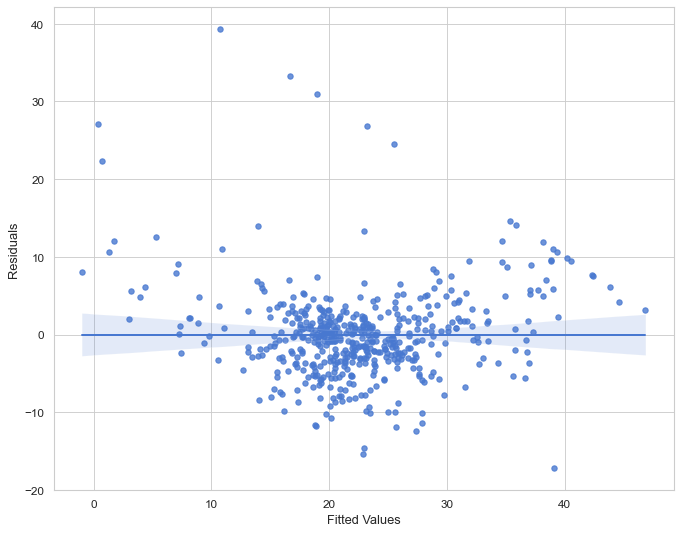

In [59]:
plt.figure(figsize=(10, 8), dpi=80)
sns.regplot(m.fittedvalues, m.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The plot displays a horizontal trend line, suggesting the absence of nonlinear patterns between response and predictors. However the residuals are not equally spread around the horizontal line. They are heavily concentrated around the (20, 0) point and fanning out towards the extremities. This suggest heteroscedasticity (heterogeneity of variance) in the model.

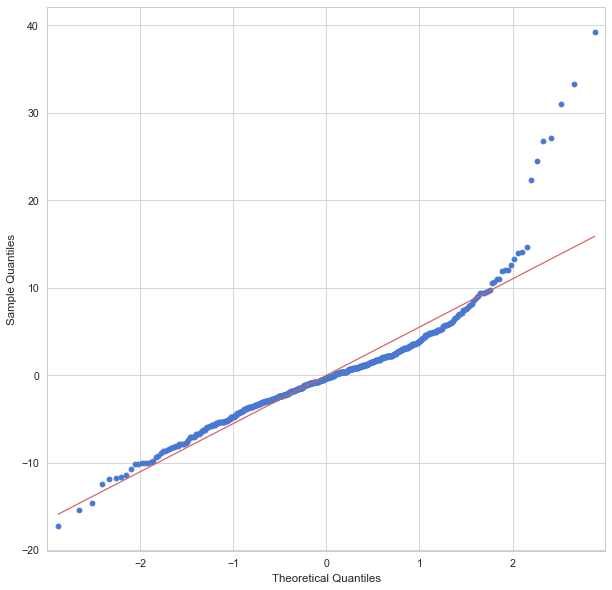

In [60]:
# Construct a quantile plot of the residuals. What does the plot tell you?
plt.rc("figure", figsize=(10, 10))
sm.qqplot(m.resid, line='r')
plt.show();

The points fall somewhat along the line albeit a slightly sinusoidal shape. However, the points curve off sharply at the upper extremity. These points are potential problems worth investigating.

In [61]:
# What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

The fitted vs. residual plot has the following advantages compared to the quantile plot:
- it facilitates the detection of non linear patterns between the response and the predictors
- it facilitates the detection of heteroscedasticity in the model

A big advantage of the quantile plot compared to the fitted vs residual plot is that it makes it easy to check if the residuals follow a normal distribution.

In [62]:
# Identify any outliers (if any) in your model and write a story describing what these outliers might represent.
bos['PRED_PRICE'] = m.fittedvalues
bos['RESIDUALS'] = m.resid
bos[['PRED_PRICE', 'RESIDUALS']].describe()

,PRED_PRICE,RESIDUALS
count,506.000000,5.060000e+02
mean,22.532806,-1.777059e-14
std,7.090373,5.857759e+00
min,-0.999617,-1.721238e+01
25%,18.852074,-3.015059e+00
50%,21.913318,-3.393716e-01
75%,25.845054,2.186788e+00
max,46.838953,3.929884e+01


In [63]:
# Calculatate IQR for the residuals
Q1_res = bos['RESIDUALS'].quantile(0.25)
Q3_res = bos['RESIDUALS'].quantile(0.75)
IQR_res = Q3_res - Q1_res
IQR_res

5.201846365807414

In [64]:
# Extract the outliers for residuals
bos_res_outliers = bos[(bos['RESIDUALS'] < (Q1_res - 1.5 * IQR_res)) | (bos['RESIDUALS'] > (Q3_res + 1.5 * IQR_res))]
bos_res_outliers_reduced = bos_res_outliers[['CRIM', 'RM', 'PTRATIO', 'PRED_PRICE', 'PRICE', 'RESIDUALS']]
bos_res_outliers_reduced

,CRIM,RM,PTRATIO,PRED_PRICE,PRICE,RESIDUALS
10,0.22489,6.377,15.2,27.390983,15.0,-12.390983
145,2.37934,6.130,14.7,25.661217,13.8,-11.861217
161,1.46336,7.489,14.7,35.878935,50.0,14.121065
162,1.83377,7.802,14.7,38.113084,50.0,11.886916
166,2.01019,7.929,14.7,39.014237,50.0,10.985763
181,0.06888,6.144,17.8,22.922503,36.2,13.277497
186,0.05602,7.831,17.8,35.375893,50.0,14.624107
195,0.01381,7.875,14.4,39.345739,50.0,10.654261
228,0.29819,7.686,17.4,34.683916,46.7,12.016084
342,0.02498,6.540,15.9,27.886281,16.5,-11.386281


In [65]:
bos_res_outliers_reduced.describe()

,CRIM,RM,PTRATIO,PRED_PRICE,PRICE,RESIDUALS
count,27.000000,27.00000,27.000000,27.000000,27.000000,27.000000
mean,7.154557,6.24537,18.544444,21.422154,30.533333,9.111179
std,6.707543,1.39021,2.349195,12.657162,17.450788,16.650863
min,0.013810,3.56100,14.400000,0.372333,7.200000,-17.212383
25%,1.648565,5.28900,16.650000,12.430009,14.400000,-11.494838
50%,4.898220,6.37700,20.200000,22.922503,27.500000,12.016084
75%,11.881700,7.25250,20.200000,31.285099,50.000000,18.480318
max,20.716200,8.78000,20.200000,39.345739,50.000000,39.298836


In [66]:
bos_reduced = bos[['CRIM', 'RM', 'PTRATIO', 'PRED_PRICE', 'PRICE', 'RESIDUALS']]
bos_reduced.describe()

,CRIM,RM,PTRATIO,PRED_PRICE,PRICE,RESIDUALS
count,506.000000,506.000000,506.000000,506.000000,506.000000,5.060000e+02
mean,3.613524,6.284634,18.455534,22.532806,22.532806,-1.777059e-14
std,8.601545,0.702617,2.164946,7.090373,9.197104,5.857759e+00
min,0.006320,3.561000,12.600000,-0.999617,5.000000,-1.721238e+01
25%,0.082045,5.885500,17.400000,18.852074,17.025000,-3.015059e+00
50%,0.256510,6.208500,19.050000,21.913318,21.200000,-3.393716e-01
75%,3.677083,6.623500,20.200000,25.845054,25.000000,2.186788e+00
max,88.976200,8.780000,22.000000,46.838953,50.000000,3.929884e+01


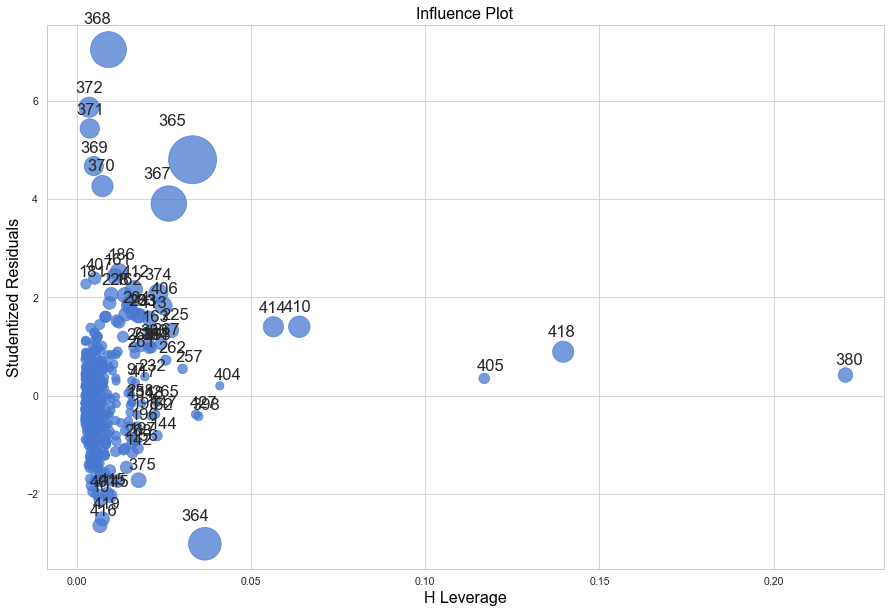

In [67]:
# Construct a leverage plot and identify high leverage points in the model.
plt.rc("figure", figsize=(15, 10))
sm.graphics.influence_plot(m, criterion='cooks')
plt.show();

In [68]:
# Influence summary table
influence_df = m.get_influence().summary_frame()
influence_df.head()

,dfb_Intercept,dfb_CRIM,dfb_RM,dfb_PTRATIO,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.035140,0.000412,0.004115,0.049678,0.001045,-0.817854,0.006208,-0.064642,-0.817584,-0.064621
1,-0.003705,0.008572,-0.001235,0.004238,0.000199,-0.575202,0.002397,-0.028193,-0.574819,-0.028174
2,-0.025394,-0.005671,0.037987,0.006262,0.000653,0.697322,0.005347,0.051126,0.696965,0.051100
3,-0.036905,-0.012698,0.042049,0.022197,0.000911,0.875186,0.004736,0.060373,0.874982,0.060359
4,-0.059036,-0.015171,0.068097,0.033309,0.001991,1.167191,0.005811,0.089234,1.167614,0.089266


In [69]:
# Cut-off point is usually 3 times the mean of Cook's Distance
cut_off = 3 * influence_df['cooks_d'].mean()
cut_off

0.008303897794044467

In [70]:
# Extract high leverage points and sort them by order of importance
bos_reduced['cooks_d'] = influence_df.loc[:, 'cooks_d']
bos_reduced_lev = bos_reduced[bos_reduced.cooks_d > cut_off]
bos_reduced_lev.sort_values(by = 'cooks_d', ascending = False)

NameError: name 'bos_reduced_lev' is not defined

In [ ]:
bos_reduced_lev.describe()

In [ ]:
# Identify the observations that are both outliers and leverage points
bos_out_lev = pd.merge(bos_res_outliers_reduced, bos_reduced_lev, how='inner', left_index=True, right_index=True)
bos_out_lev

There are 6 observations that are both outliers and leverage points. It wouldbe interesting to see how the model improves if we remove just those 6 data points from our analysis.

In [ ]:
# exclude the 6 data points that are both outliers and high leverage points from dataset
bos_clean1 = bos[~bos.index.isin([364, 365, 367, 374, 406, 412])]
bos_clean1.shape

In [ ]:
# run OLS with cleaned dataset
m_clean1 = ols('PRICE ~ CRIM + RM + PTRATIO', bos_clean1).fit()
print(m_clean1.summary())

R-squared improved by over 0.05 from 0.594 to 0.645. AIC also improved from 3232 to 3130.

In [ ]:
# Remove the outliers and high leverage points from your model and run the regression again.
# How do the results change?
outliers_idx = bos_res_outliers_reduced.index
lev_idx = bos_reduced_lev.index
bad_idx = list(set(list(outliers_idx) + list(lev_idx)))
print('Indices of observations to be removed:', bad_idx)

bos_clean2 = bos[~bos.index.isin(bad_idx)]
print(bos_clean2.shape)

m_clean2 = ols('PRICE ~ CRIM + RM + PTRATIO', bos_clean2).fit()
print(m_clean2.summary())

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
sns.regplot(m_clean2.fittedvalues, m_clean2.resid)
plt.xlabel('Fitted Values (clean2)')
plt.ylabel('Residuals (clean2)')
plt.show()

In [ ]:
plt.rc("figure", figsize=(10, 10))
sm.qqplot(m_clean2.resid, line='r')
plt.show();

The model improved noticeably by removing both outliers and high leverage points:
- R-squared improved by 0.175 from 0.594 to 0.769
- AIC improved from 3232 to 2552
- spread of residuals significantly improved per fitted-residuals plot
- residuals appear to be normally distributed per qqplot